In [334]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [335]:
df = pd.read_csv("train.csv")

In [336]:
df.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [337]:
df.shape

(23880, 17)

In [338]:
df.isnull().sum()

customer_id                     0
customer_age                  477
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [339]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  object 
 1   customer_age                23403 non-null  float64
 2   job_type                    23880 non-null  object 
 3   marital                     23773 non-null  object 
 4   education                   23880 non-null  object 
 5   default                     23880 non-null  object 
 6   balance                     23603 non-null  float64
 7   housing_loan                23880 non-null  object 
 8   personal_loan               23767 non-null  object 
 9   communication_type          23880 non-null  object 
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  object 
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    237

In [340]:
for column in df.columns:
    print(column,df[column].nunique())

customer_id 23880
customer_age 75
job_type 12
marital 3
education 4
default 2
balance 5811
housing_loan 2
personal_loan 2
communication_type 3
day_of_month 31
month 12
last_contact_duration 312
num_contacts_in_campaign 44
num_contacts_prev_campaign 38
prev_campaign_outcome 4
term_deposit_subscribed 2


In [341]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23403.000000,23603.000000,23880.000000,23880.000000,23784.000000,23880.000000,23880.000000
mean,40.394821,1363.966106,15.796315,854.879648,2.775353,0.583836,0.106198
std,10.753045,3019.583085,8.321136,74.537616,3.148117,2.624465,0.308097
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000
25%,32.000000,71.000000,8.000000,809.000000,1.000000,0.000000,0.000000
50%,38.000000,443.000000,16.000000,871.000000,2.000000,0.000000,0.000000
75%,48.000000,1410.500000,21.000000,897.000000,3.000000,0.000000,0.000000
max,93.000000,98419.000000,31.000000,1019.000000,63.000000,275.000000,1.000000


In [342]:
df.term_deposit_subscribed.value_counts()

0    21344
1     2536
Name: term_deposit_subscribed, dtype: int64

<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='count'>

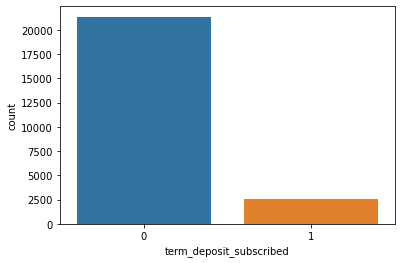

In [343]:
sns.countplot(x='term_deposit_subscribed',data=df)

In [344]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique()) 

customer_id
['id_32289' 'id_40992' 'id_41178' ... 'id_44679' 'id_4841' 'id_1723']
job_type
['blue-collar' 'management' 'technician' 'services' 'retired'
 'entrepreneur' 'admin.' 'student' 'housemaid' 'self-employed' 'unknown'
 'unemployed']
marital
['married' 'single' 'divorced' nan]
education
['secondary' 'primary' 'tertiary' 'unknown']
default
['no' 'yes']
housing_loan
['no' 'yes']
personal_loan
['yes' 'no' nan]
communication_type
['cellular' 'unknown' 'telephone']
month
['nov' 'may' 'aug' 'apr' 'feb' 'jun' 'jul' 'jan' 'oct' 'sep' 'mar' 'dec']
prev_campaign_outcome
['other' 'unknown' 'failure' 'success']


<AxesSubplot:xlabel='count', ylabel='job_type'>

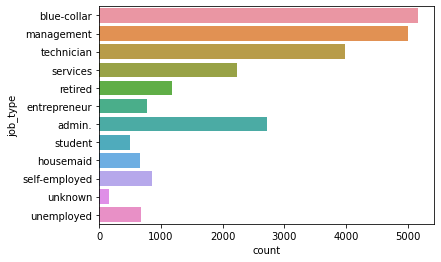

In [345]:
sns.countplot(y='job_type',data=df)

<AxesSubplot:xlabel='count', ylabel='marital'>

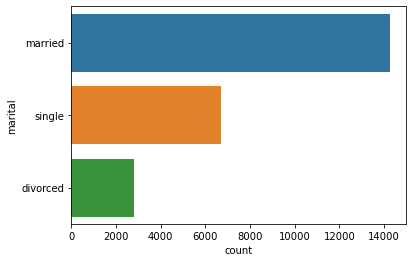

In [346]:
sns.countplot(y='marital',data=df)

<AxesSubplot:xlabel='count', ylabel='education'>

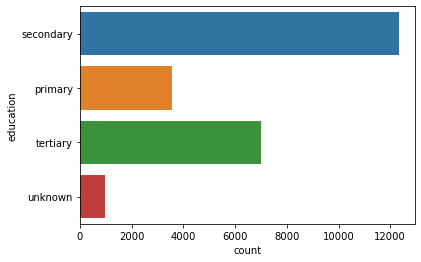

In [347]:
sns.countplot(y='education',data=df)

<AxesSubplot:xlabel='count', ylabel='default'>

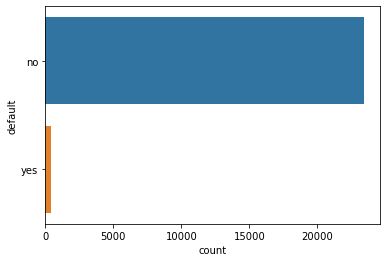

In [348]:
sns.countplot(y='default',data=df) #unimportant

<AxesSubplot:xlabel='count', ylabel='housing_loan'>

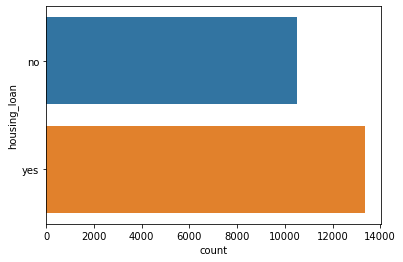

In [349]:
sns.countplot(y='housing_loan',data=df) #balance in the feature

<AxesSubplot:xlabel='count', ylabel='personal_loan'>

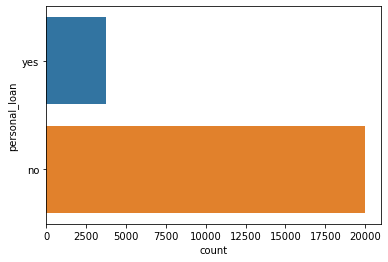

In [350]:
sns.countplot(y='personal_loan',data=df) #with no loans don't opt for term deposits

<AxesSubplot:xlabel='count', ylabel='communication_type'>

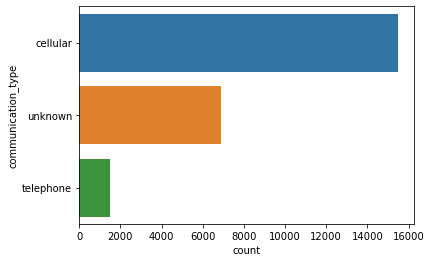

In [351]:
sns.countplot(y='communication_type',data=df)

<AxesSubplot:xlabel='count', ylabel='month'>

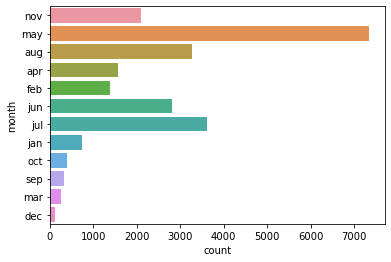

In [352]:
sns.countplot(y='month',data=df)

<AxesSubplot:xlabel='count', ylabel='prev_campaign_outcome'>

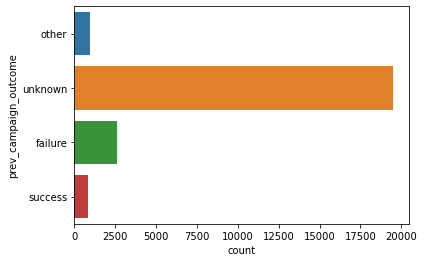

In [353]:
sns.countplot(y='prev_campaign_outcome',data=df)

In [354]:
df.customer_age=df.customer_age.fillna(34)
df

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,993,2.0,3,other,0
23876,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,855,7.0,0,unknown,0
23877,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,883,2.0,0,unknown,0
23878,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,803,6.0,0,unknown,0


In [355]:
df.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [356]:
df = df.replace('unknown', np.NaN)

In [357]:
df.isnull().sum()

customer_id                       0
customer_age                      0
job_type                        154
marital                         107
education                       986
default                           0
balance                         277
housing_loan                      0
personal_loan                   113
communication_type             6892
day_of_month                      0
month                             0
last_contact_duration             0
num_contacts_in_campaign         96
num_contacts_prev_campaign        0
prev_campaign_outcome         19513
term_deposit_subscribed           0
dtype: int64

In [358]:
df = df[df.job_type.notna()]
df.isnull().sum()

customer_id                       0
customer_age                      0
job_type                          0
marital                         107
education                       915
default                           0
balance                         277
housing_loan                      0
personal_loan                   113
communication_type             6831
day_of_month                      0
month                             0
last_contact_duration             0
num_contacts_in_campaign         95
num_contacts_prev_campaign        0
prev_campaign_outcome         19377
term_deposit_subscribed           0
dtype: int64

In [359]:
df = df[df.marital.notna()]
df.isnull().sum()

customer_id                       0
customer_age                      0
job_type                          0
marital                           0
education                       913
default                           0
balance                         273
housing_loan                      0
personal_loan                   113
communication_type             6795
day_of_month                      0
month                             0
last_contact_duration             0
num_contacts_in_campaign         95
num_contacts_prev_campaign        0
prev_campaign_outcome         19294
term_deposit_subscribed           0
dtype: int64

In [360]:
def randomCatFill(df, colName):
    perm = np.random.permutation(df[colName])
    
    perm = perm[~pd.isnull(perm)]
    
    end = len(perm)
    df[colName] = df[colName].apply(lambda x: perm[np.random.randint(end)] if pd.isnull(x) else x)

In [361]:
randomCatFill(df, 'education')
randomCatFill(df, 'personal_loan')
randomCatFill(df, 'communication_type')

In [362]:
df.isnull().sum()

customer_id                       0
customer_age                      0
job_type                          0
marital                           0
education                         0
default                           0
balance                         273
housing_loan                      0
personal_loan                     0
communication_type                0
day_of_month                      0
month                             0
last_contact_duration             0
num_contacts_in_campaign         95
num_contacts_prev_campaign        0
prev_campaign_outcome         19294
term_deposit_subscribed           0
dtype: int64

In [363]:
df.prev_campaign_outcome = df.prev_campaign_outcome.fillna("nonexistent")

In [364]:
df.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                         0
education                       0
default                         0
balance                       273
housing_loan                    0
personal_loan                   0
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       95
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [365]:
df = df[df.num_contacts_in_campaign.notna()]
df.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                         0
education                       0
default                         0
balance                       273
housing_loan                    0
personal_loan                   0
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign        0
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [366]:
df.balance.mode()

0    3.0
dtype: float64

In [367]:
current_balance = df.pivot_table(values='balance', columns='job_type', aggfunc=(lambda x: x.mean()[0]))

In [368]:
current_balance

job_type,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
balance,1125.321563,1102.675761,1512.725955,1442.75,1794.717285,2000.95986,1677.40311,965.30371,1326.635628,1227.701282,1419.781297


In [369]:
miss_values = df['balance'].isnull()   

In [370]:
miss_values

0        False
1        False
2        False
3        False
4        False
         ...  
23875    False
23876    False
23877    False
23878    False
23879    False
Name: balance, Length: 23524, dtype: bool

In [371]:
df.loc[miss_values, 'balance'] = df.loc[miss_values,'job_type'].apply(lambda x: current_balance[x])

In [372]:
df.isnull().sum()

customer_id                   0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

In [373]:
df.balance

0         934.0
1        1352.0
2         495.0
3         650.0
4         265.0
          ...  
23875     567.0
23876    1072.0
23877     242.0
23878    2699.0
23879    1045.0
Name: balance, Length: 23524, dtype: float64

### Corelation Matrix

<AxesSubplot:>

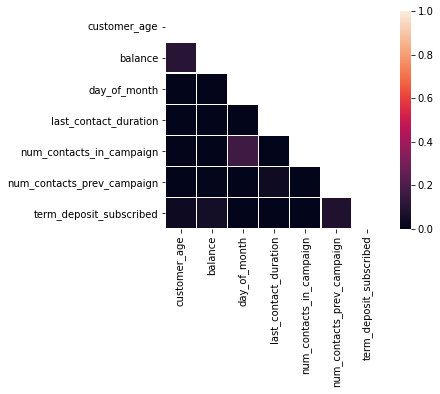

In [374]:
# get the correlation matrix
corr = df.corr()

# create a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# plot the correlation heatmap
sns.heatmap(corr, vmin=0, vmax=1, square=True,
           linewidths=.5, mask=mask, fmt='.2f')

In [375]:
df.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,nonexistent,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,nonexistent,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,no,cellular,26,may,880,1.0,0,nonexistent,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,nonexistent,0


In [376]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['n_job']=le.fit_transform(df['job_type'])
df['n_marital']=le.fit_transform(df['marital'])
df['n_education']=le.fit_transform(df['education'])
df['n_loan']=le.fit_transform(df['personal_loan'])
df['n_contact']=le.fit_transform(df['communication_type'])
df['n_month']=le.fit_transform(df['month'])
df['n_poutcome']=le.fit_transform(df['prev_campaign_outcome'])

In [377]:
df

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,...,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,...,1,other,0,1,1,1,1,0,9,2
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,...,0,nonexistent,0,1,1,0,0,0,8,1
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,...,0,nonexistent,1,1,1,0,0,0,1,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,no,cellular,...,0,nonexistent,0,4,1,2,0,0,8,1
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,...,0,nonexistent,0,9,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,...,3,other,0,0,1,1,0,0,3,2
23876,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,cellular,...,0,nonexistent,0,4,1,2,0,0,6,1
23877,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,cellular,...,0,nonexistent,0,10,1,0,0,0,8,1
23878,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,...,0,nonexistent,0,7,1,1,0,0,1,1


In [378]:
df.drop(['job_type','month','marital','education','default','housing_loan','personal_loan','communication_type',
         'prev_campaign_outcome','customer_id'],axis=1,inplace=True)

In [379]:
df

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2
23876,51.0,1072.0,20,855,7.0,0,0,4,1,2,0,0,6,1
23877,41.0,242.0,23,883,2.0,0,0,10,1,0,0,0,8,1
23878,48.0,2699.0,11,803,6.0,0,0,7,1,1,0,0,1,1


In [380]:
for col in df.select_dtypes(include='int64').columns:
  print(col)
  print(df[col].unique()) 

day_of_month
[18 13 26 19  7 16  6 17  5 22  2 20  3  4 29 30 14  9 27 31 23 12 11  8
 15 25  1 28 21 10 24]
last_contact_duration
[ 704  893  796  880  795  807  899  920  989  857  705  870  869  823
  843  794  842  841  997  933  996  888  892  751  816  774  858  916
  879  814  730  894  895  898  992  891  990  820  901  863  702  792
  801  834  752  951  788  782  991  877  837  829  876  866  817  740
  900  871  670  677  785  824  675  855  808  902  889  913  872  859
  761  809  883  830  986  706  887  998  919  936  827  789  929  873
  897  701  885  825  793  878  890  906  803  815  703  886  802  853
  828  963  728  800  950  836  806  874  754  909  838  850  733  864
  969  786  923  810  993  922  958  787  881  835  984  662  822  968
  856  965  812  762  724  710  833  725  711  935  735 1013  668  783
  882  678  861  921  695  959  985  821  739  716  758  928  831  778
  952  849  797  847  720  726  685  768  927  731  804  860  937  938
  930  718  745  

In [381]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
count,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000
mean,40.225047,1360.878599,15.800119,854.916638,2.770405,0.585402,0.106232,4.294253,1.164853,1.150060,0.159454,0.087188,5.538471,0.997024
std,10.660200,3005.177283,8.319657,74.608798,3.133031,2.637983,0.308141,3.235169,0.611246,0.661726,0.366107,0.282116,3.012283,0.532887
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,74.000000,8.000000,809.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000
50%,38.000000,455.500000,16.000000,871.000000,2.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,6.000000,1.000000
75%,48.000000,1413.250000,21.000000,897.000000,3.000000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,8.000000,1.000000
max,93.000000,98419.000000,31.000000,1019.000000,63.000000,275.000000,1.000000,10.000000,2.000000,2.000000,1.000000,1.000000,11.000000,3.000000


### Outlier Detection

<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='n_poutcome'>

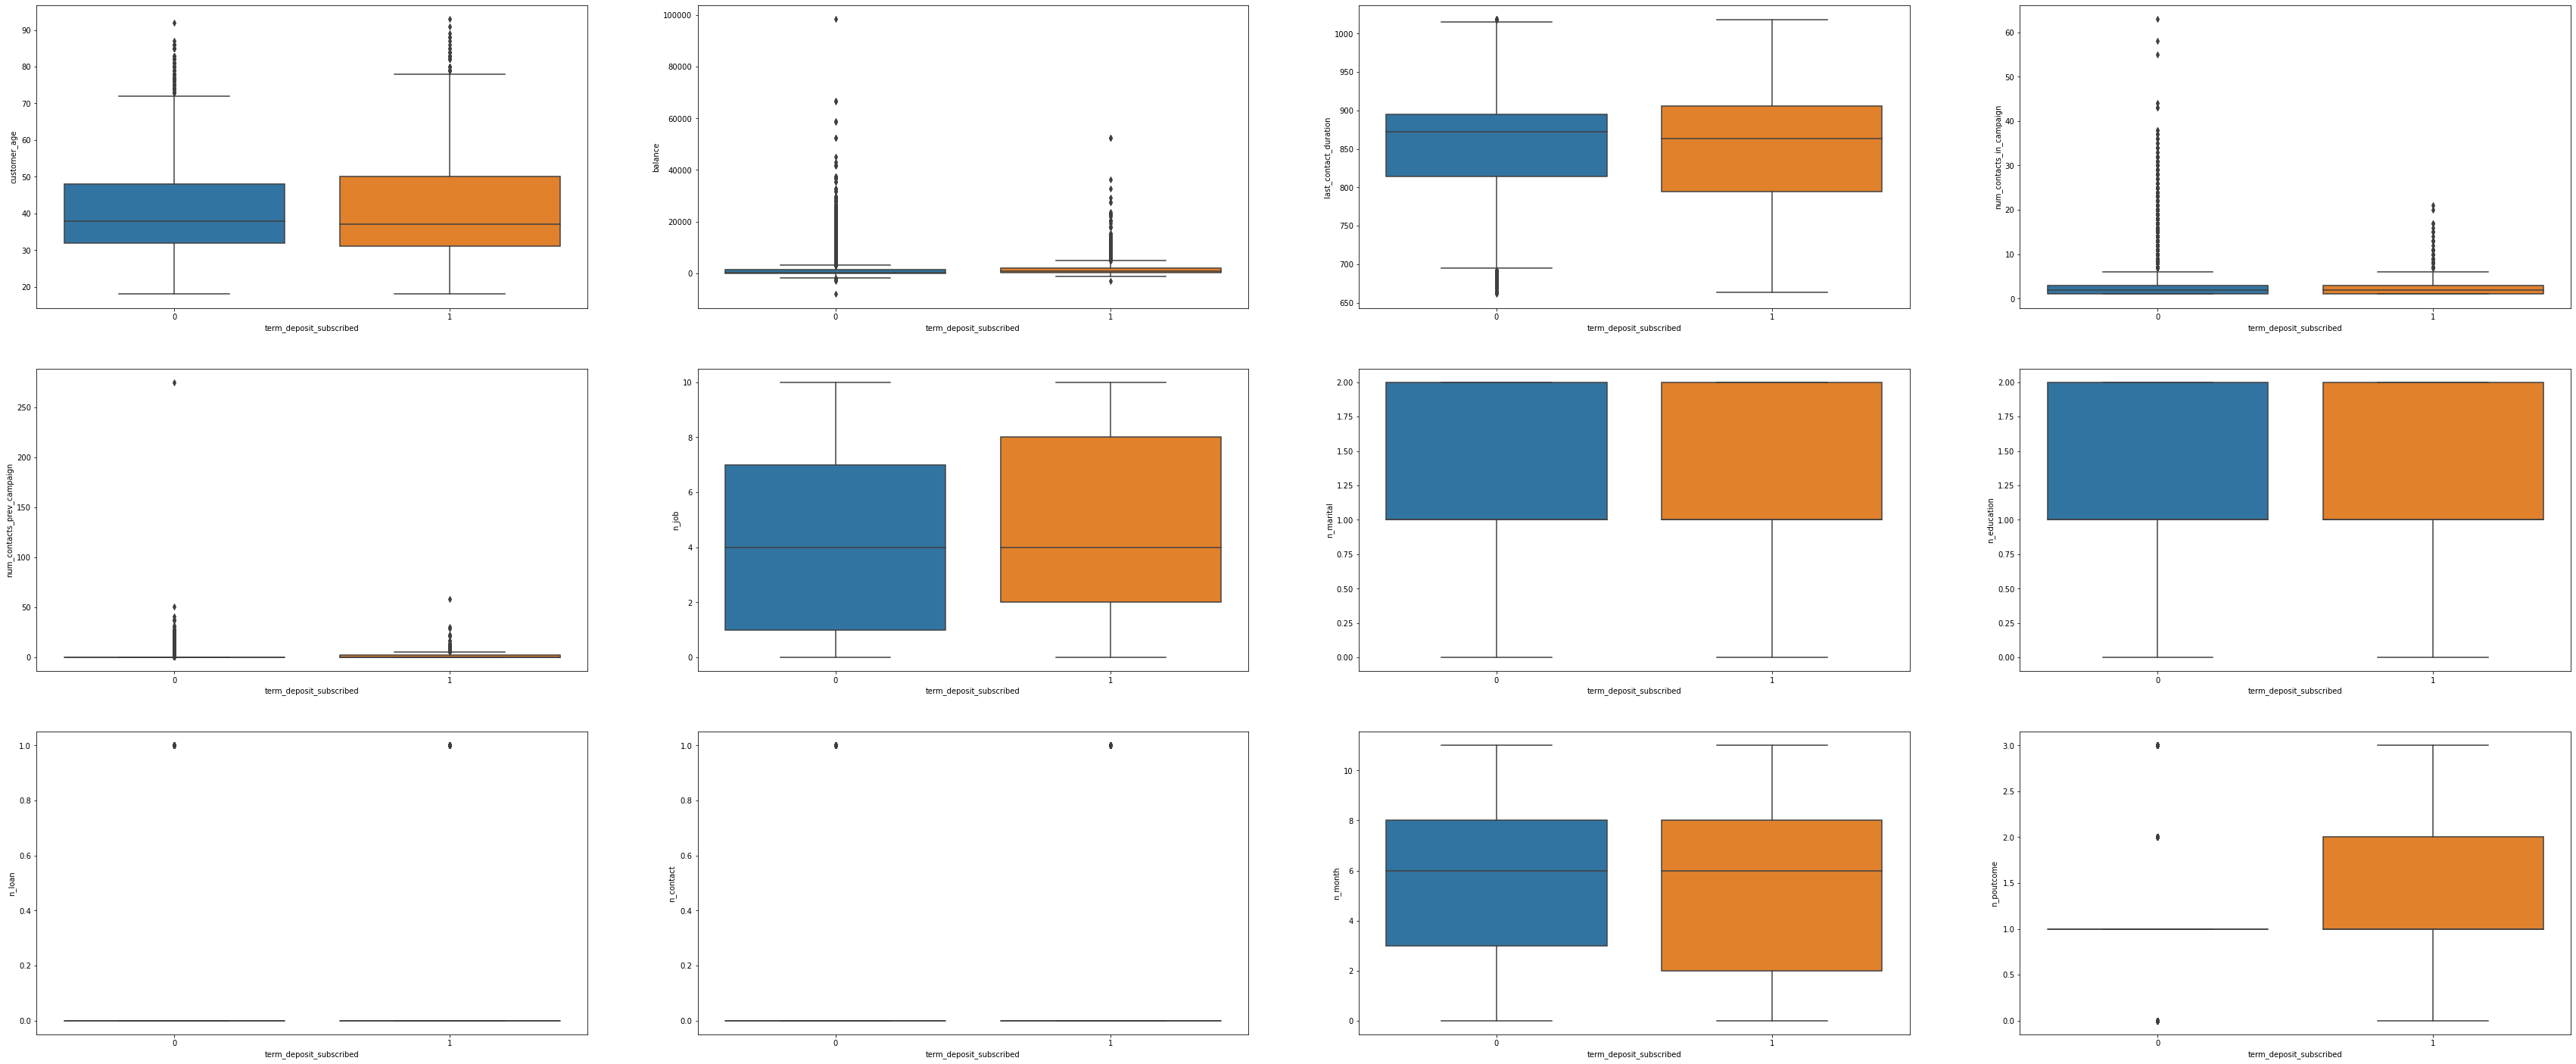

In [382]:
figure, axis = plt.subplots(3, 4, figsize = (60,25))
sns.boxplot(x='term_deposit_subscribed',y='customer_age',data=df,ax=axis[0,0])
sns.boxplot(x='term_deposit_subscribed',y='balance',data=df,ax=axis[0,1])
sns.boxplot(x='term_deposit_subscribed',y='last_contact_duration',data=df,ax=axis[0,2])
sns.boxplot(x='term_deposit_subscribed',y='num_contacts_in_campaign',data=df,ax=axis[0,3])
sns.boxplot(x='term_deposit_subscribed',y='num_contacts_prev_campaign',data=df,ax=axis[1,0])
sns.boxplot(x='term_deposit_subscribed',y='n_job',data=df,ax=axis[1,1])
sns.boxplot(x='term_deposit_subscribed',y='n_marital',data=df,ax=axis[1,2])
sns.boxplot(x='term_deposit_subscribed',y='n_education',data=df,ax=axis[1,3])
sns.boxplot(x='term_deposit_subscribed',y='n_loan',data=df,ax=axis[2,0])
sns.boxplot(x='term_deposit_subscribed',y='n_contact',data=df,ax=axis[2,1])
sns.boxplot(x='term_deposit_subscribed',y='n_month',data=df,ax=axis[2,2])
sns.boxplot(x='term_deposit_subscribed',y='n_poutcome',data=df,ax=axis[2,3])

In [383]:
outcome_zero=df[df['term_deposit_subscribed'] == 0]
outcome_zero

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2
23876,51.0,1072.0,20,855,7.0,0,0,4,1,2,0,0,6,1
23877,41.0,242.0,23,883,2.0,0,0,10,1,0,0,0,8,1
23878,48.0,2699.0,11,803,6.0,0,0,7,1,1,0,0,1,1


### Outliers Removal

In [384]:
def Outdet(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    LR=Q1-(IQR*1.5)
    UR=Q3+(IQR*1.5)
    return LR,UR

In [385]:
LR,UR=Outdet(outcome_zero.customer_age)
print(LR,UR)

8.0 72.0


In [386]:
outcome_zero=outcome_zero[(outcome_zero['customer_age'] > LR)  &  (outcome_zero['customer_age'] < UR)]

In [387]:
outcome_zero

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2
23876,51.0,1072.0,20,855,7.0,0,0,4,1,2,0,0,6,1
23877,41.0,242.0,23,883,2.0,0,0,10,1,0,0,0,8,1
23878,48.0,2699.0,11,803,6.0,0,0,7,1,1,0,0,1,1


In [388]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)

-1852.5 3247.5


In [389]:
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2
23876,51.0,1072.0,20,855,7.0,0,0,4,1,2,0,0,6,1
23877,41.0,242.0,23,883,2.0,0,0,10,1,0,0,0,8,1
23878,48.0,2699.0,11,803,6.0,0,0,7,1,1,0,0,1,1


In [390]:
LR,UR=Outdet(outcome_zero.last_contact_duration)
print(LR,UR)

692.0 1020.0


In [391]:
outcome_zero=outcome_zero[(outcome_zero['last_contact_duration']>LR) & (outcome_zero['last_contact_duration']< UR)]
outcome_zero

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2
23876,51.0,1072.0,20,855,7.0,0,0,4,1,2,0,0,6,1
23877,41.0,242.0,23,883,2.0,0,0,10,1,0,0,0,8,1
23878,48.0,2699.0,11,803,6.0,0,0,7,1,1,0,0,1,1


In [392]:
LR,UR=Outdet(outcome_zero.num_contacts_in_campaign)
print(LR,UR)

-2.0 6.0


In [393]:
outcome_zero=outcome_zero[(outcome_zero['num_contacts_in_campaign']>LR) & (outcome_zero['num_contacts_in_campaign']< UR)]
outcome_zero

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [394]:
outcome_one=df[df['term_deposit_subscribed'] == 1]
outcome_one

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23831,32.0,5612.0,28,817,3.0,0,1,6,1,1,0,0,5,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [395]:
LR,UR=Outdet(outcome_one.customer_age)
print(LR,UR)

2.5 78.5


In [396]:
outcome_one=outcome_one[(outcome_one['customer_age'] > LR)  &  (outcome_one['customer_age'] < UR)]
outcome_one

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23831,32.0,5612.0,28,817,3.0,0,1,6,1,1,0,0,5,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [397]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)

-2688.25 5063.75


In [398]:
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [399]:
LR,UR=Outdet(outcome_one.last_contact_duration)
print(LR,UR)

631.0 1071.0


In [400]:
outcome_one=outcome_one[(outcome_one['last_contact_duration']>LR) & (outcome_one['last_contact_duration']< UR)]
outcome_one

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [401]:
LR,UR=Outdet(outcome_one.num_contacts_in_campaign)
print(LR,UR)

-2.0 6.0


In [402]:
outcome_one=outcome_one[(outcome_one['num_contacts_in_campaign']>LR) & (outcome_one['num_contacts_in_campaign']< UR)]
outcome_one

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [403]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-2018.625 3844.375


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [404]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-1308.125 2278.875


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [405]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-1728.25 3301.75


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [406]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-1549.25 2970.75


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [407]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-1106.5 1913.5


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [408]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-1008.5 1739.5


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [409]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-1495.625 2847.375


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [410]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-965.0 1659.0


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [411]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-1443.0 2757.0


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [412]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-944.625 1622.375


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [413]:
LR,UR=Outdet(outcome_zero.customer_age)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['customer_age']>LR) & (outcome_zero['customer_age']< UR)]
outcome_zero

11.0 67.0


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [414]:
LR,UR=Outdet(outcome_one.customer_age)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['customer_age']>LR) & (outcome_one['customer_age']< UR)]
outcome_one

3.0 75.0


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [415]:
df_1=pd.concat([outcome_zero,outcome_one],axis=0)
df_1

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [416]:
df_1.term_deposit_subscribed.value_counts()

0    14632
1     1884
Name: term_deposit_subscribed, dtype: int64

<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='n_poutcome'>

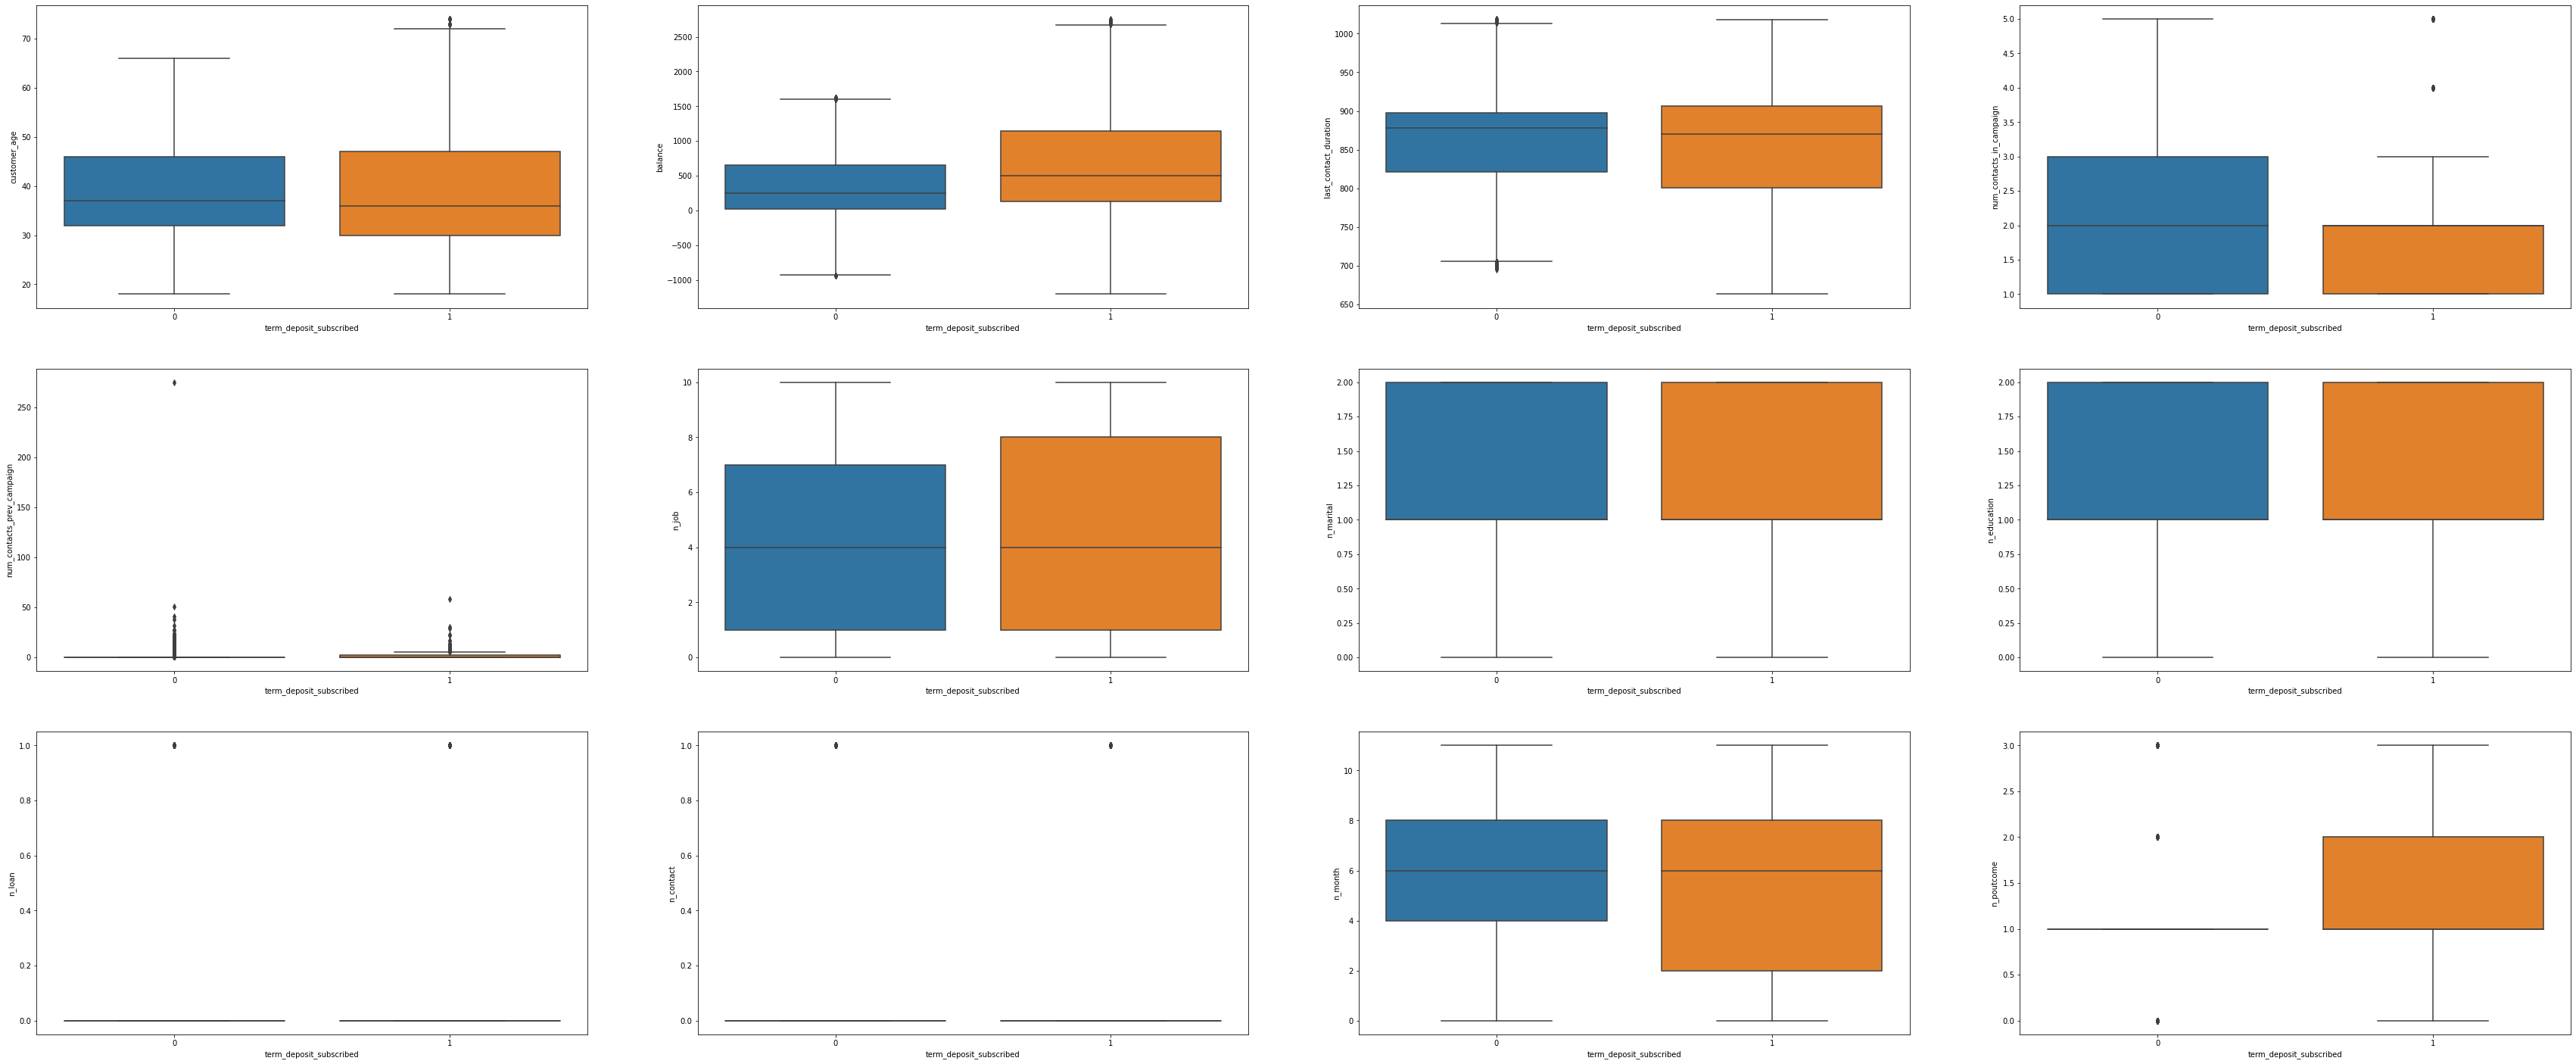

In [417]:
figure, axis = plt.subplots(3, 4, figsize = (60,25))
sns.boxplot(x='term_deposit_subscribed',y='customer_age',data=df_1,ax=axis[0,0])
sns.boxplot(x='term_deposit_subscribed',y='balance',data=df_1,ax=axis[0,1])
sns.boxplot(x='term_deposit_subscribed',y='last_contact_duration',data=df_1,ax=axis[0,2])
sns.boxplot(x='term_deposit_subscribed',y='num_contacts_in_campaign',data=df_1,ax=axis[0,3])
sns.boxplot(x='term_deposit_subscribed',y='num_contacts_prev_campaign',data=df_1,ax=axis[1,0])
sns.boxplot(x='term_deposit_subscribed',y='n_job',data=df_1,ax=axis[1,1])
sns.boxplot(x='term_deposit_subscribed',y='n_marital',data=df_1,ax=axis[1,2])
sns.boxplot(x='term_deposit_subscribed',y='n_education',data=df_1,ax=axis[1,3])
sns.boxplot(x='term_deposit_subscribed',y='n_loan',data=df_1,ax=axis[2,0])
sns.boxplot(x='term_deposit_subscribed',y='n_contact',data=df_1,ax=axis[2,1])
sns.boxplot(x='term_deposit_subscribed',y='n_month',data=df_1,ax=axis[2,2])
sns.boxplot(x='term_deposit_subscribed',y='n_poutcome',data=df_1,ax=axis[2,3])

<AxesSubplot:>

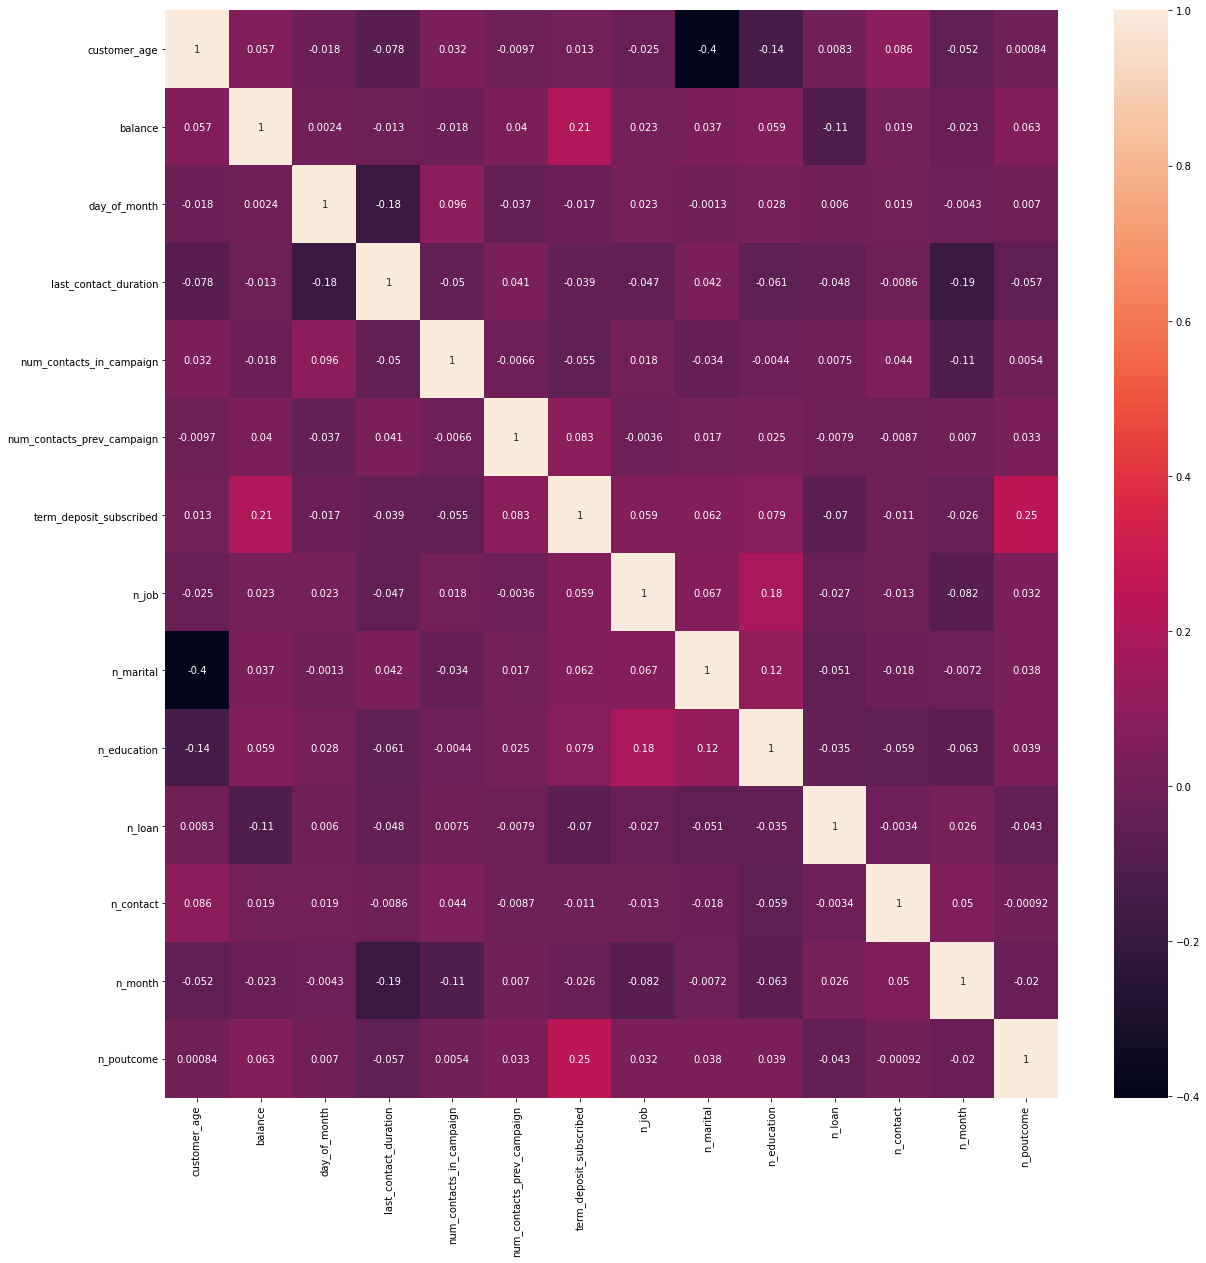

In [418]:
plt.figure(figsize=(20,20))
sns.heatmap(df_1.corr(),annot =True)

In [419]:
df_1

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,0,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


## Oversampling

In [420]:
count_class_0, count_class_1 = df_1.term_deposit_subscribed.value_counts()

# Divide by class
df_class_0 = df_1[df_1['term_deposit_subscribed'] == 0]
df_class_1 = df_1[df_1['term_deposit_subscribed'] == 1]

In [421]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.term_deposit_subscribed.value_counts())

Random over-sampling:
1    14632
0    14632
Name: term_deposit_subscribed, dtype: int64


In [422]:
x=df_test_over.drop(['term_deposit_subscribed','day_of_month'],axis=1).values
print(x)
y=df_test_over['term_deposit_subscribed'].values
print(y)

[[ 3.400e+01  9.340e+02  7.040e+02 ...  0.000e+00  9.000e+00  2.000e+00]
 [ 4.100e+01  1.352e+03  8.930e+02 ...  0.000e+00  8.000e+00  1.000e+00]
 [ 3.700e+01  6.500e+02  8.800e+02 ...  0.000e+00  8.000e+00  1.000e+00]
 ...
 [ 3.100e+01  2.017e+03  9.060e+02 ...  0.000e+00  0.000e+00  1.000e+00]
 [ 6.300e+01 -2.000e+00  8.080e+02 ...  0.000e+00  1.000e+00  1.000e+00]
 [ 3.500e+01  8.700e+01  9.000e+02 ...  0.000e+00  8.000e+00  2.000e+00]]
[0 0 0 ... 1 1 1]


In [423]:
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2,stratify=y)

## Scaling of data

In [424]:
from sklearn.preprocessing import StandardScaler
std_model=StandardScaler()
x_train_std_features=std_model.fit_transform(x_train)
x_test_std_features=std_model.transform(x_test)

In [425]:
x_train_std_features.shape

(23411, 12)

In [426]:
x_test_std_features.shape

(5853, 12)

## Logistic Regression

In [427]:
from sklearn.linear_model import LogisticRegression
modelreg=LogisticRegression()
modelreg.fit(x_train_std_features,y_train)

LogisticRegression()

In [428]:
ypred=modelreg.predict(x_test_std_features)
ypred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [429]:
modelreg.score(x_test_std_features,y_test)

0.6716213907397915

In [430]:
x_test_std_features.shape

(5853, 12)

In [431]:
y_test.shape

(5853,)

In [432]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, ypred))
print("Precision:",metrics.precision_score(y_test, ypred))
print("Recall:",metrics.recall_score(y_test, ypred))

Accuracy: 0.6716213907397915
Precision: 0.7067545304777595
Recall: 0.5864661654135338


In [433]:
cnf_matrix = metrics.confusion_matrix(y_test, ypred)
cnf_matrix

array([[2215,  712],
       [1210, 1716]], dtype=int64)

## KNN

In [434]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(x_train_std_features, y_train)

KNeighborsClassifier()

In [435]:
y_predicted_KNN = KNN_model.predict(x_test_std_features)

In [436]:
KNN_model.score(x_test_std_features,y_test)

0.8785238339313173

In [437]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_KNN))
print("Precision:",metrics.precision_score(y_test,y_predicted_KNN))
print("Recall:",metrics.recall_score(y_test, y_predicted_KNN))

Accuracy: 0.8785238339313173
Precision: 0.8172443425952449
Recall: 0.9750512645249487


In [438]:
## Naive Byes

from sklearn.naive_bayes import GaussianNB
naive_bayes_model= GaussianNB()
naive_bayes_model.fit(x_train_std_features, y_train)

GaussianNB()

In [439]:
y_predicted_naive = naive_bayes_model.predict(x_test_std_features)

In [440]:
naive_bayes_model.score(x_test_std_features,y_test)

0.6709379805228088

In [441]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_naive))
print("Precision:",metrics.precision_score(y_test,y_predicted_naive))
print("Recall:",metrics.recall_score(y_test, y_predicted_naive))

Accuracy: 0.6709379805228088
Precision: 0.7579979360165119
Recall: 0.5020505809979494


In [442]:
from sklearn.tree import DecisionTreeClassifier
deseciontree_model=DecisionTreeClassifier()
deseciontree_model.fit(x_train_std_features, y_train)

y_predicted_deseciontree = deseciontree_model.predict(x_test_std_features)
deseciontree_model.score(x_test_std_features,y_test)

0.9456688877498719

In [443]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_deseciontree))
print("Precision:",metrics.precision_score(y_test,y_predicted_deseciontree))
print("Recall:",metrics.recall_score(y_test, y_predicted_deseciontree))

Accuracy: 0.9456688877498719
Precision: 0.9042157470551767
Recall: 0.9969241285030759


In [444]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model= RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
randomforest_model.fit(x_train_std_features, y_train)

y_predicted_randomforest = randomforest_model.predict(x_test_std_features)
randomforest_model.score(x_test_std_features,y_test)

0.9791559883820263

In [445]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_randomforest))
print("Precision:",metrics.precision_score(y_test,y_predicted_randomforest))
print("Recall:",metrics.recall_score(y_test, y_predicted_randomforest))

Accuracy: 0.9791559883820263
Precision: 0.9645460569913851
Recall: 0.9948735475051265


In [446]:
from sklearn.svm import SVC
SVM_model_rbf=SVC(kernel='rbf')
SVM_model_rbf.fit(x_train_std_features,y_train)

y_predicted_SVM_rbf = SVM_model_rbf.predict(x_test_std_features)
SVM_model_rbf.score(x_test_std_features,y_test)

0.7462839569451564

In [447]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_SVM_rbf))
print("Precision:",metrics.precision_score(y_test,y_predicted_SVM_rbf))
print("Recall:",metrics.recall_score(y_test, y_predicted_SVM_rbf))

Accuracy: 0.7462839569451564
Precision: 0.812852800694746
Recall: 0.6397812713602188


In [448]:
from sklearn.svm import SVC
SVM_model_linear=SVC(kernel='linear')
SVM_model_linear.fit(x_train_std_features,y_train)

y_predicted_SVM_linear = SVM_model_linear.predict(x_test_std_features)
SVM_model_linear.score(x_test_std_features,y_test)

0.6596617119425935

In [449]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_SVM_linear))
print("Precision:",metrics.precision_score(y_test,y_predicted_SVM_linear))
print("Recall:",metrics.recall_score(y_test, y_predicted_SVM_linear))

Accuracy: 0.6596617119425935
Precision: 0.7434827945776851
Recall: 0.48735475051264526


In [450]:
from sklearn.ensemble import GradientBoostingClassifier
GradientB_model=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0)

GradientB_model.fit(x_train_std_features,y_train)
y_predicted_GradientB = GradientB_model.predict(x_test_std_features)
GradientB_model.score(x_test_std_features,y_test)

0.8382026311293354

In [451]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_GradientB))
print("Precision:",metrics.precision_score(y_test,y_predicted_GradientB))
print("Recall:",metrics.recall_score(y_test, y_predicted_GradientB))

Accuracy: 0.8382026311293354
Precision: 0.8581252262034021
Recall: 0.8103212576896788


In [452]:
from sklearn.model_selection import cross_val_score
accuracygb = cross_val_score(GradientB_model,x_train_std_features,y_train, scoring='accuracy', cv = 10)
print(accuracygb)

[0.82322801 0.84536523 0.82742418 0.84194789 0.82870568 0.8338317
 0.83041435 0.83126869 0.82998718 0.83340453]


In [453]:
accuracygb.mean()

0.8325577433571019

In [454]:
GradientB_model.feature_importances_

array([0.08426582, 0.31867126, 0.20175927, 0.01216857, 0.03507681,
       0.03093027, 0.01947944, 0.01255166, 0.0108151 , 0.00414225,
       0.0723391 , 0.19780045])

In [455]:
from sklearn.ensemble import AdaBoostClassifier
Adaboost_model=AdaBoostClassifier(n_estimators=100)
Adaboost_model.fit(x_train_std_features,y_train)
y_predicted_Adaboost = Adaboost_model.predict(x_test_std_features)
Adaboost_model.score(x_test_std_features,y_test)

0.7502135656928071

In [456]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_Adaboost))
print("Precision:",metrics.precision_score(y_test,y_predicted_Adaboost))
print("Recall:",metrics.recall_score(y_test, y_predicted_Adaboost))

Accuracy: 0.7502135656928071
Precision: 0.8532818532818532
Recall: 0.6042378673957621


In [457]:
accuracyada = cross_val_score(Adaboost_model,x_train_std_features,y_train, scoring='accuracy', cv = 10)
print(accuracyada)

[0.74722459 0.76164032 0.75694148 0.75437847 0.75651431 0.75096113
 0.75181546 0.75779581 0.75224263 0.75010679]


In [458]:
accuracyada.mean()

0.7539621006153625

In [459]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc
report_GradientB = classification_report(y_test,y_predicted_GradientB)
print(report_GradientB)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      2927
           1       0.86      0.81      0.83      2926

    accuracy                           0.84      5853
   macro avg       0.84      0.84      0.84      5853
weighted avg       0.84      0.84      0.84      5853



In [460]:
roc_auc_score(y_test,y_predicted_GradientB)

0.8381978683392023

In [461]:
fpr,tpr,threshold =roc_curve(y_test,y_predicted_GradientB)
auc = auc(fpr,tpr)

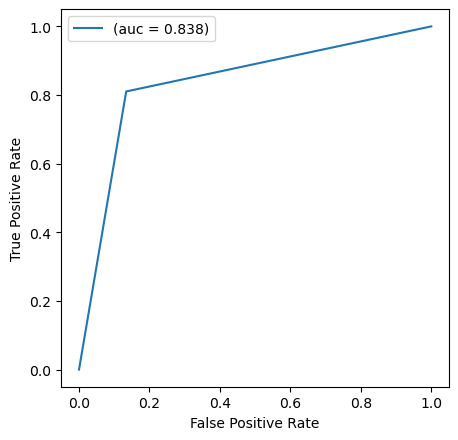

In [462]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [463]:
test = pd.read_csv("test.csv")

In [464]:
test.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown
1,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown
2,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown
3,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown
4,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure


In [465]:
for column in test.columns:
    print(column,test[column].nunique())

customer_id 7767
customer_age 72
job_type 12
marital 3
education 4
default 2
balance 3266
housing_loan 2
personal_loan 2
communication_type 3
last_contact_duration 283
day_of_month 31
month 12
num_contacts_in_campaign 38
num_contacts_prev_campaign 29
prev_campaign_outcome 4


In [466]:
test.describe()

,customer_age,balance,last_contact_duration,day_of_month,num_contacts_in_campaign,num_contacts_prev_campaign
count,7625.000000,7645.000000,7767.000000,7767.000000,7751.000000,7767.000000
mean,40.575475,1380.914454,854.417536,15.886958,2.780544,0.615553
std,10.745877,3280.231914,74.628693,8.328768,3.169323,2.069363
min,18.000000,-4062.000000,663.000000,1.000000,1.000000,0.000000
25%,32.000000,74.000000,809.000000,8.000000,1.000000,0.000000
50%,39.000000,465.000000,871.000000,16.000000,2.000000,0.000000
75%,48.000000,1429.000000,897.000000,21.000000,3.000000,0.000000
max,97.000000,102128.000000,1020.000000,31.000000,46.000000,55.000000


In [467]:
mode = test.customer_age.mode()
mode

0    34.0
dtype: float64

In [468]:
test.customer_age=test.customer_age.fillna(34)
test

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown
1,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown
2,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown
3,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown
4,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,id_29917,52.0,technician,married,secondary,no,1764.0,yes,no,unknown,863,12,jun,2.0,0,unknown
7763,id_9275,50.0,management,divorced,tertiary,no,401.0,no,no,cellular,843,2,jul,1.0,6,failure
7764,id_16678,56.0,admin.,married,secondary,no,227.0,no,yes,cellular,705,17,nov,1.0,0,unknown
7765,id_26369,28.0,entrepreneur,married,secondary,no,NaN,yes,no,unknown,879,27,may,1.0,0,unknown


In [469]:
test.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                        43
education                       0
default                         0
balance                       122
housing_loan                    0
personal_loan                  36
communication_type              0
last_contact_duration           0
day_of_month                    0
month                           0
num_contacts_in_campaign       16
num_contacts_prev_campaign      0
prev_campaign_outcome           0
dtype: int64

In [470]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7767 entries, 0 to 7766
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7767 non-null   object 
 1   customer_age                7767 non-null   float64
 2   job_type                    7767 non-null   object 
 3   marital                     7724 non-null   object 
 4   education                   7767 non-null   object 
 5   default                     7767 non-null   object 
 6   balance                     7645 non-null   float64
 7   housing_loan                7767 non-null   object 
 8   personal_loan               7731 non-null   object 
 9   communication_type          7767 non-null   object 
 10  last_contact_duration       7767 non-null   int64  
 11  day_of_month                7767 non-null   int64  
 12  month                       7767 non-null   object 
 13  num_contacts_in_campaign    7751 

In [471]:
 test.num_contacts_in_campaign=test.num_contacts_in_campaign.replace(np.nan,-1)

In [472]:
 test.marital=test.marital.replace(np.nan,"unknown")

In [473]:
def randomCatFill(test, colName):
    perm = np.random.permutation(test[colName])
    
    perm = perm[~pd.isnull(perm)]
    
    end = len(perm)
    test[colName] = test[colName].apply(lambda x: perm[np.random.randint(end)] if pd.isnull(x) else x)

In [474]:
randomCatFill(test, 'education')
randomCatFill(test, 'personal_loan')
randomCatFill(test, 'communication_type')

In [475]:
test.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                         0
education                       0
default                         0
balance                       122
housing_loan                    0
personal_loan                   0
communication_type              0
last_contact_duration           0
day_of_month                    0
month                           0
num_contacts_in_campaign        0
num_contacts_prev_campaign      0
prev_campaign_outcome           0
dtype: int64

In [476]:
test.balance.mode()

0    0.0
dtype: float64

In [477]:
current_balance = test.pivot_table(values='balance', columns='job_type', aggfunc=(lambda x: x.mean()[0]))

In [478]:
current_balance

job_type,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
balance,1038.806271,1010.583694,1886.942748,1399.991266,1764.030581,2044.081081,1644.787072,1139.087719,1612.789809,1256.260764,1655.183857,1945.428571


In [479]:
miss_values = test['balance'].isnull()   
miss_values

0       False
1       False
2       False
3       False
4       False
        ...  
7762    False
7763    False
7764    False
7765     True
7766    False
Name: balance, Length: 7767, dtype: bool

In [480]:
test.loc[miss_values, 'balance'] = test.loc[miss_values,'job_type'].apply(lambda x: current_balance[x])
test.isnull().sum()

customer_id                   0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
last_contact_duration         0
day_of_month                  0
month                         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
dtype: int64

In [481]:
test['n_job']=le.fit_transform(test['job_type'])
test['n_marital']=le.fit_transform(test['marital'])
test['n_education']=le.fit_transform(test['education'])
test['n_loan']=le.fit_transform(test['personal_loan'])
test['n_contact']=le.fit_transform(test['communication_type'])
test['n_month']=le.fit_transform(test['month'])
test['n_poutcome']=le.fit_transform(test['prev_campaign_outcome'])

In [482]:
test.drop(['job_type','month','marital','education','default','housing_loan','personal_loan','communication_type',
         'prev_campaign_outcome','customer_id','day_of_month'],axis=1,inplace=True)

In [483]:
test

,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,28.0,285.000000,849,4.0,0,4,2,2,0,2,6,3
1,46.0,656.000000,990,4.0,0,9,1,1,0,0,3,3
2,34.0,2.000000,886,3.0,0,7,2,1,0,2,8,3
3,65.0,2880.000000,913,1.0,0,5,1,0,0,0,0,3
4,52.0,1779.000000,703,3.0,1,1,1,2,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7762,52.0,1764.000000,863,2.0,0,9,1,1,0,2,6,3
7763,50.0,401.000000,843,1.0,6,4,0,2,0,0,5,0
7764,56.0,227.000000,705,1.0,0,0,1,1,1,0,9,3
7765,28.0,1886.942748,879,1.0,0,2,1,1,0,2,8,3


In [484]:
 test=test.replace(np.nan,-1)

In [485]:
test.isnull().sum()

customer_age                  0
balance                       0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
n_job                         0
n_marital                     0
n_education                   0
n_loan                        0
n_contact                     0
n_month                       0
n_poutcome                    0
dtype: int64

In [486]:
test_pred = Adaboost_model.predict(test)

C:\Users\mini9\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [487]:
submit = pd.DataFrame()

In [488]:
test1 = pd.read_csv('test.csv')
submit['customer_id'] = test1['customer_id']
submit['term_deposit_subscribed'] = test_pred

In [489]:
submit.to_csv('submissionv2.csv', header=True, index=False)